# Checkpoint 2 - Classificadores


## Instruções

Leia atentamente as instruções.

1) O trabalho deve ser realizado em grupo. Pode ser o mesmo grupo do challenge. Não deve ter nenhum grupo maior do que o maior grupo de challenge.

2) Você deverá submenter este arquivo Jupyter Notebook com as respostas nos campos indicados. Caso ache necessário, crie células markdown para comentar suas respostas e apontamentos.

3) Apenas um aluno submeterá no Teams. Mude o nome do arquivo para as iniciais do seu nome completo seguido do seu RM. Exemplo: HFS84100-NAC1

4) A entrega deverá ser feita até às <font color='red'>**23h59** </font> de  <font color='red'>**15/maio/2021** </font> em tarefa a ser aberta no Microsoft Teams.

5) A pontuação das questões estão marcadas em cada uma.

6) Todos os datasets usados aqui são públicos e podem ser consultados em https://www.kaggle.com ou em https://www.openml.org/

7) Dúvidas, pergunte para o professor.

## Nomes:

Aluno RM:
- Fabbio Augusto de Souza Moura Boli - 84695
- Leandro de Jesus Luna - 86492
- Pedro Fernandes - 84244

---------------------------

## Dataset: Corrida

Você recebeu dados de acelerômetro de um celular iOS.

Com eles é possível estimar se a pessoa está andando ou correndo.

Classes alvo:
- "0": walking (andando) 
- "1": running (correndo)

Mais informações sobre os dados podem ser obtidas em https://www.openml.org/d/40922

### Questão 1:  Carregue os dados descritivos e alvo na mesma tabela. Gere estatísticas básicas para todos os dados e para os dados agrupados nas classes alvo. <font color='red'> (1 ponto) </font>

In [1]:
import pandas as pd

from sklearn.datasets import fetch_openml 

import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
dados_corrida = fetch_openml(data_id=40922)

In [3]:
dados_corrida

{'data':        acceleration_x  acceleration_y  acceleration_z   gyro_x   gyro_y  \
 0              0.2650         -0.7814         -0.0076  -0.0590   0.0325   
 1              0.6722        -11.2330         -0.2344  -0.1757   0.0208   
 2              0.4399        -14.8170          0.0722  -0.9105   0.1063   
 3              0.3031         -0.8125          0.0888   0.1199  -0.4099   
 4              0.4814         -0.9312          0.0359   0.0527   0.4379   
 ...               ...             ...             ...      ...      ...   
 88583          0.3084         -0.8376         -0.1327   0.4823  20.1240   
 88584          0.4977        -10.0270         -0.4397   0.1022 -12.5650   
 88585          0.4587        -11.7800         -0.2827 -14.5000  -0.2792   
 88586          0.2590         -0.8582         -0.0759 -15.1650   0.4560   
 88587          0.3140         -0.8008         -0.0911   0.1183  10.8500   
 
         gyro_z  
 0     -29.2960  
 1       0.1269  
 2     -24.3670  
 3    

In [4]:
# Transformando em dataframe
df_corrida = pd.DataFrame(data = dados_corrida.data, columns=dados_corrida.feature_names) 

In [5]:
# Colocando a coluna alvo
df_corrida['activity'] = dados_corrida.target

In [6]:
df_corrida.head()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,activity
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-29.2960,0
1,0.6722,-11.2330,-0.2344,-0.1757,0.0208,0.1269,0
2,0.4399,-14.8170,0.0722,-0.9105,0.1063,-24.3670,0
3,0.3031,-0.8125,0.0888,0.1199,-0.4099,-29.3360,0
4,0.4814,-0.9312,0.0359,0.0527,0.4379,24.9220,0


In [7]:
df_corrida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   acceleration_x  88588 non-null  float64 
 1   acceleration_y  88588 non-null  float64 
 2   acceleration_z  88588 non-null  float64 
 3   gyro_x          88588 non-null  float64 
 4   gyro_y          88588 non-null  float64 
 5   gyro_z          88588 non-null  float64 
 6   activity        88588 non-null  category
dtypes: category(1), float64(6)
memory usage: 4.1 MB


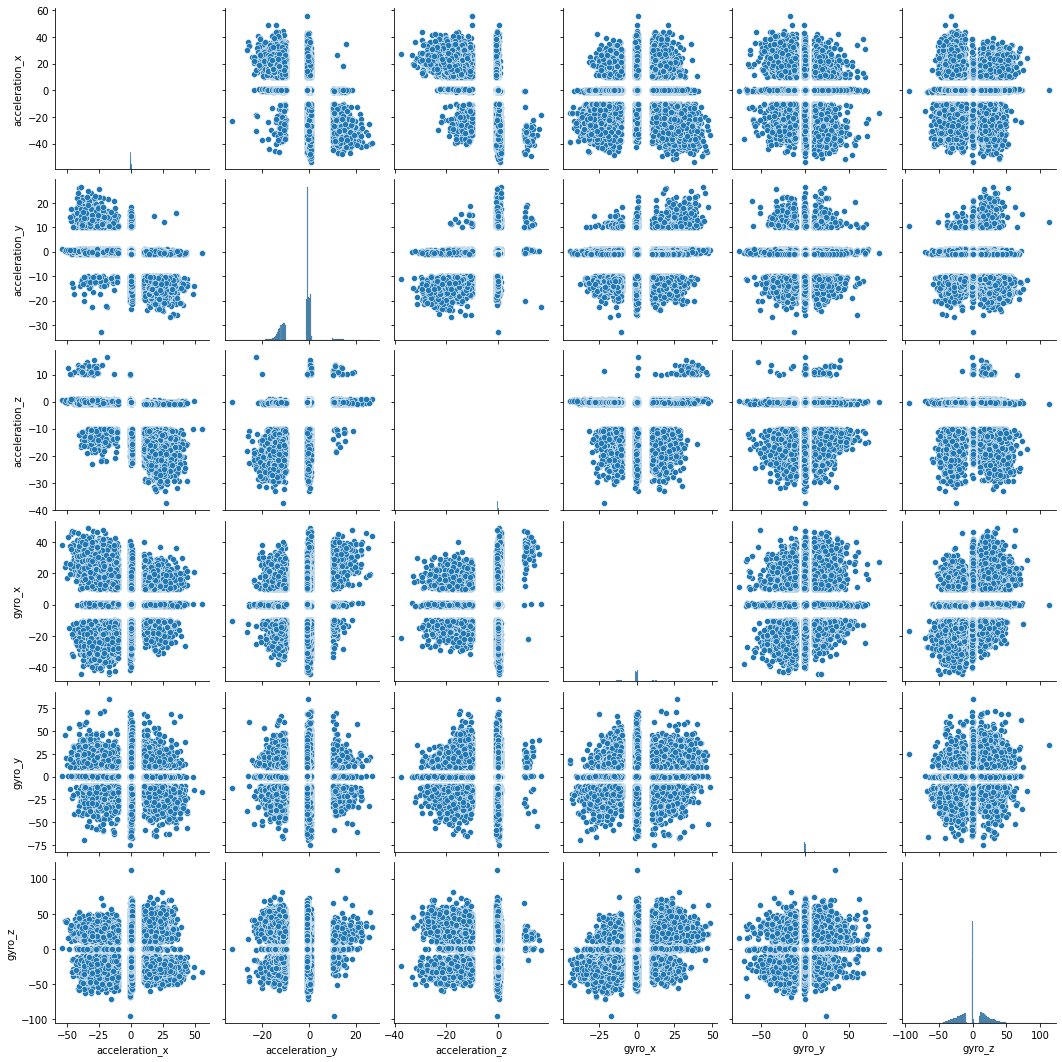

In [8]:
sns.pairplot(df_corrida)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Escolhendo as colunas preditivas e alvo
x = df_corrida.drop(columns = ['activity']) # Colunas descritivas
y = df_corrida['activity']                # Valor alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
# Instanciando o Escalonador
#scaler = StandardScaler()
escalonado = MinMaxScaler()

# Treinando o escalonador
escalonado.fit(x_train)

# Usando o escalonador treinado para transformar os dados
x_train_escalonado = escalonado.transform(x_train)
x_test_escalonado = escalonado.transform(x_test)

### Questão 2:  Crie um classificador com acurácia de pelo menos 85%. <font color='red'> (3 pontos) </font>

Plote a matriz de confusão e comente os resultados obtidos em cima dos dados de teste.

Nesta mesma célula markdown, descreva quais foram as técnicas que você usou para conseguir essa acurácia.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier()

knn.fit(x_train_escalonado, y_train)  

KNeighborsClassifier()

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix,classification_report
from sklearn.metrics import cohen_kappa_score, accuracy_score

In [16]:
y_pred_corrida = knn.predict(x_test_escalonado) 

<Figure size 1440x360 with 0 Axes>

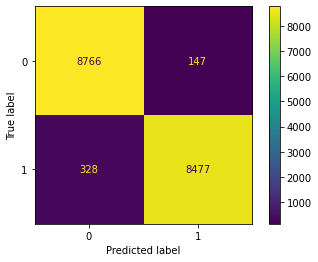

In [17]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_pred_corrida,
                                   labels=['0','1'])

# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(20, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['0', '1'])
disp.plot(values_format='d') 


In [18]:
cohen_kappa_score(y_test, y_pred_corrida)

0.9463735391384371

In [19]:
print(classification_report(y_test, y_pred_corrida))
print(f"Acurácia: {accuracy_score(y_test, y_pred_corrida) * 100:.2f}%, com um coeficiente de cohen de aproximadamente 95%")

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8913
           1       0.98      0.96      0.97      8805

    accuracy                           0.97     17718
   macro avg       0.97      0.97      0.97     17718
weighted avg       0.97      0.97      0.97     17718

Acurácia: 97.32%, com um coeficiente de cohen de aproximadamente 95%


Coloque sua resposta escrita aqui

- Utlizando o KNN, k-vizinhos próximos, conseguimos uma acurácia de, em média, 97%.

---------------------------
## Dataset: Partículas Cósmicas

Você recebeu dados sobre raios gamas a serem detectados em experimentos de detecção de partículas cósmicas por radiação Cherenkov.

Com eles é possível estimar se a partícula é cósmica (raio gama) ou de background (hadrons).

Mais informações sobre os dados podem ser obtidas em https://www.openml.org/d/1120

### Questão 3:  Carregue os dados descritivos e alvo na mesma tabela. Gere estatísticas básicas para todos os dados e para os dados agrupados nas classes alvo. <font color='red'> (1 ponto) </font>

In [20]:
import pandas as pd

from sklearn.datasets import fetch_openml 

import matplotlib.pyplot as plt  
import seaborn as sns

In [21]:
dados_particulas = fetch_openml(data_id=1120)

In [22]:
dados_particulas

{'data':        fLength:   fWidth:  fSize:  fConc:  fConc1:    fAsym:  fM3Long:  \
 0       28.7967   16.0021  2.6449  0.3918   0.1982   27.7004   22.0110   
 1       31.6036   11.7235  2.5185  0.5303   0.3773   26.2722   23.8238   
 2      162.0520  136.0310  4.0612  0.0374   0.0187  116.7410  -64.8580   
 3       23.8172    9.5728  2.3385  0.6147   0.3922   27.2107   -6.4633   
 4       75.1362   30.9205  3.1611  0.3168   0.1832   -5.5277   28.5525   
 ...         ...       ...     ...     ...      ...       ...       ...   
 19015   21.3846   10.9170  2.6161  0.5857   0.3934   15.2618   11.5245   
 19016   28.9452    6.7020  2.2672  0.5351   0.2784   37.0816   13.1853   
 19017   75.4455   47.5305  3.4483  0.1417   0.0549   -9.3561   41.0562   
 19018  120.5135   76.9018  3.9939  0.0944   0.0683    5.8043  -93.5224   
 19019  187.1814   53.0014  3.2093  0.2876   0.1539 -167.3125 -168.4558   
 
        fM3Trans:  fAlpha:    fDist:  
 0        -8.2027  40.0920   81.8828  
 1        -9

In [23]:
# Transformando em dataframe
df_particulas = pd.DataFrame(data = dados_particulas.data, columns=dados_particulas.feature_names) 

In [24]:
# Coluna alvo
df_particulas['target'] = dados_particulas.target

In [25]:
df_particulas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   fLength:   19020 non-null  float64 
 1   fWidth:    19020 non-null  float64 
 2   fSize:     19020 non-null  float64 
 3   fConc:     19020 non-null  float64 
 4   fConc1:    19020 non-null  float64 
 5   fAsym:     19020 non-null  float64 
 6   fM3Long:   19020 non-null  float64 
 7   fM3Trans:  19020 non-null  float64 
 8   fAlpha:    19020 non-null  float64 
 9   fDist:     19020 non-null  float64 
 10  target     19020 non-null  category
dtypes: category(1), float64(10)
memory usage: 1.5 MB


In [26]:
df_particulas.describe()

,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


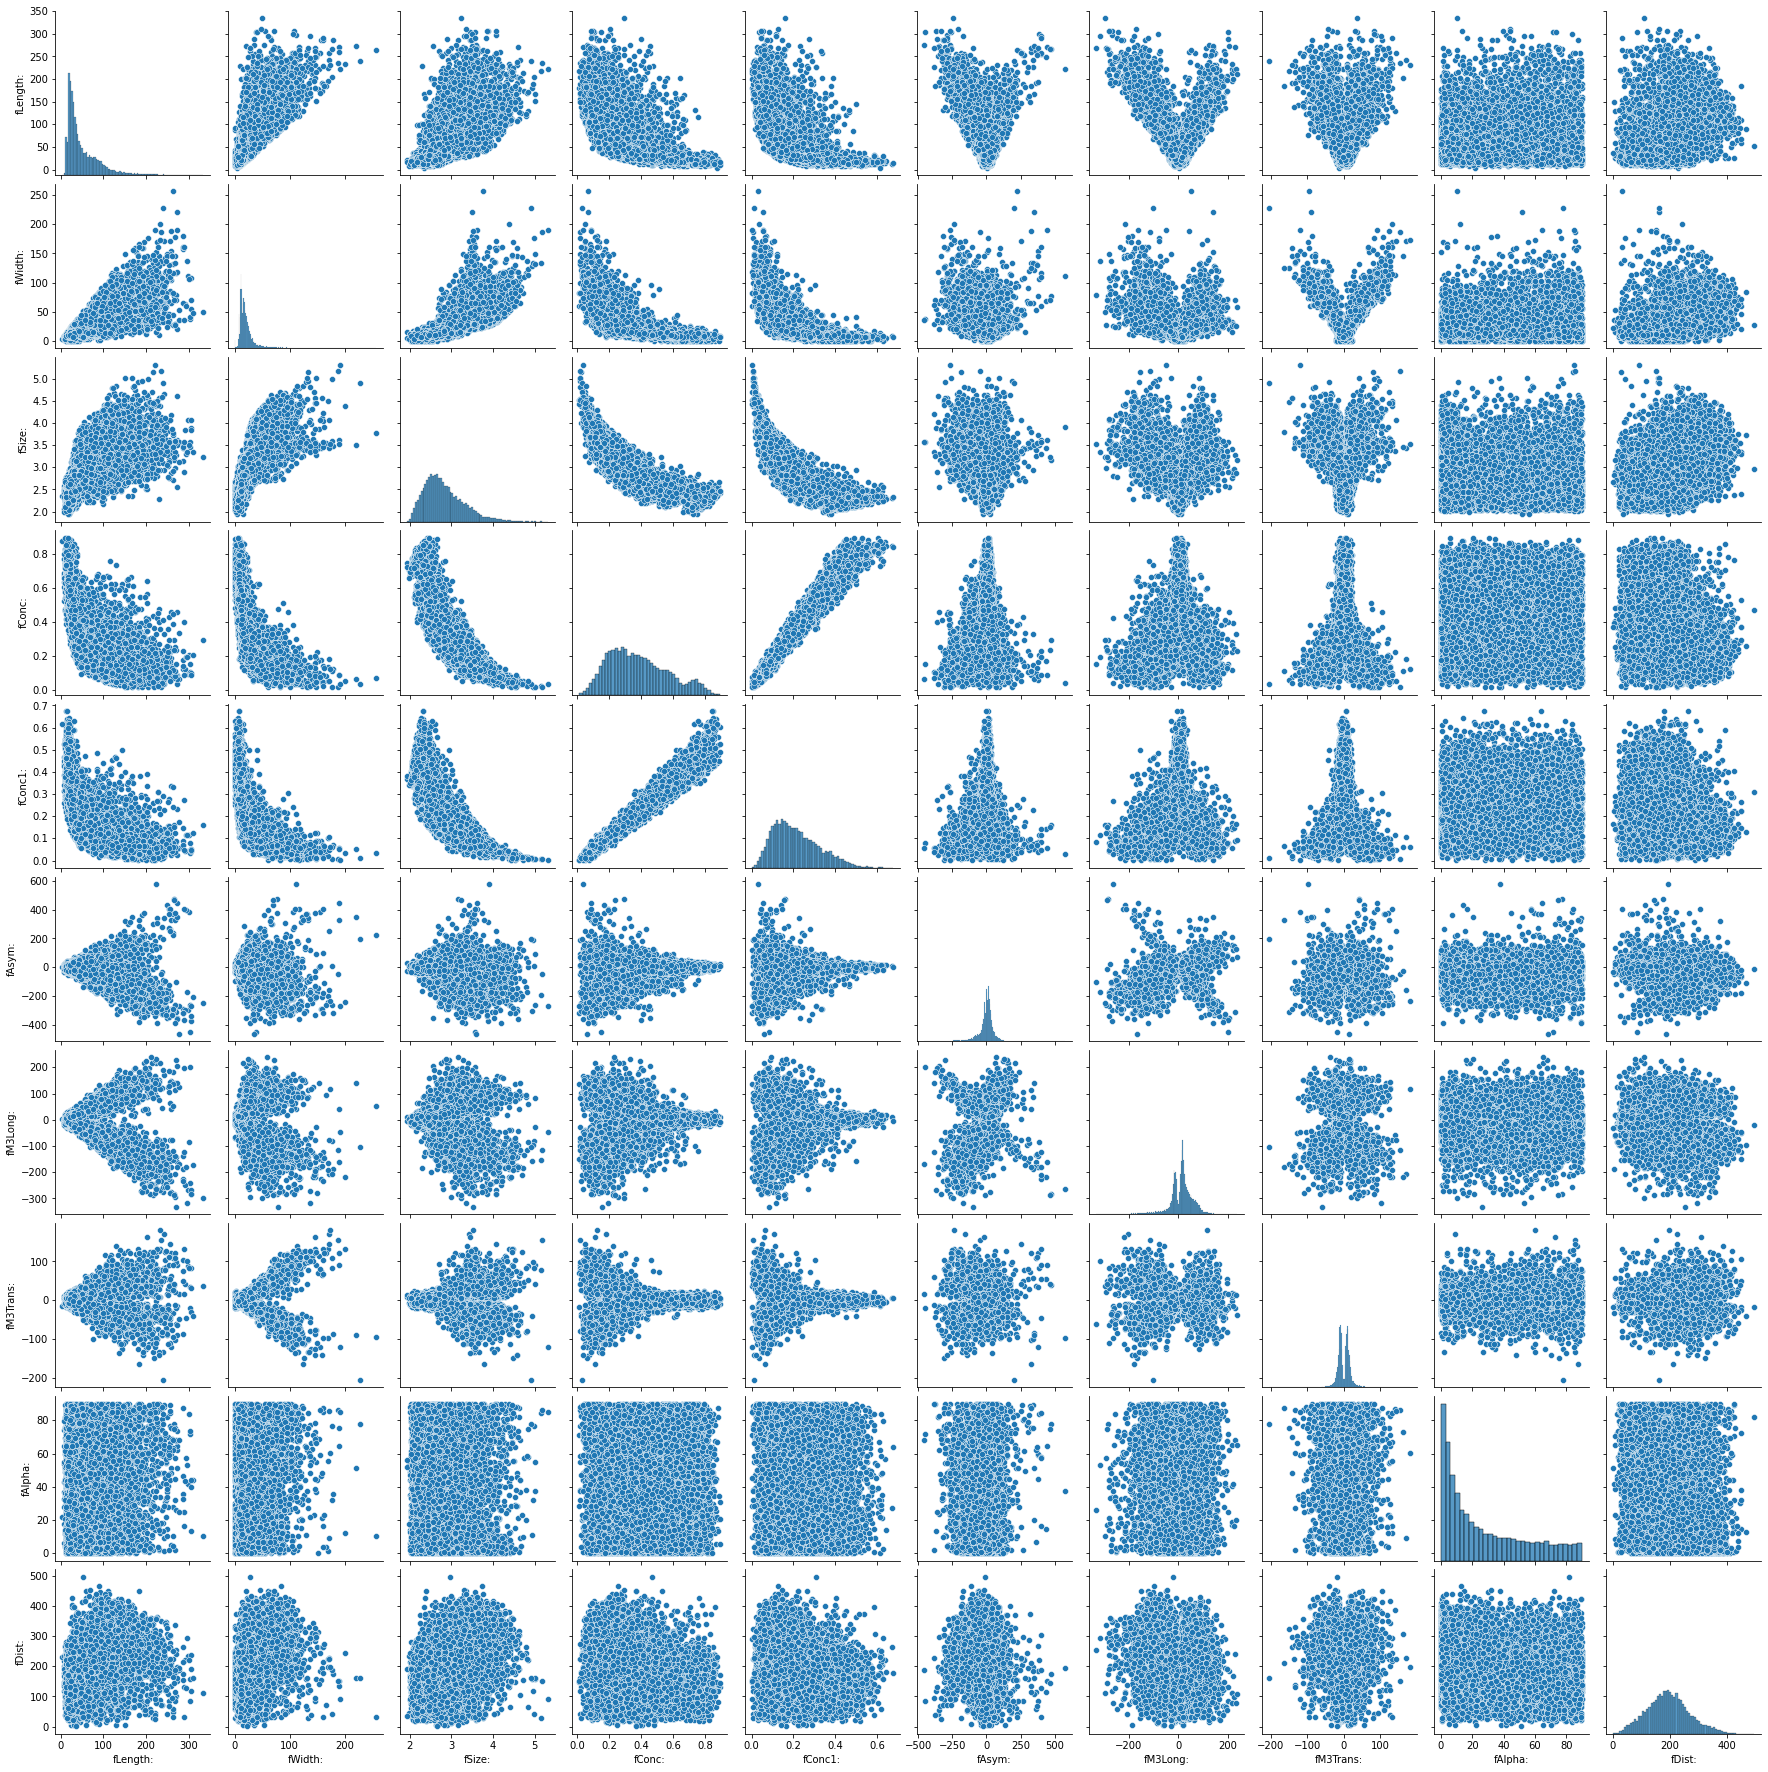

In [27]:
sns.pairplot(df_particulas)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# Escolhendo as colunas preditivas e alvo
x = df_particulas.drop(columns = ['target']) # Colunas descritivas
y = df_particulas['target']               # Valor alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [30]:
x_train.head()

,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:
18859,57.5644,20.2196,2.6830,0.4232,0.2334,-22.5785,-55.5914,11.8193,26.1085,217.5440
17299,27.7996,14.0561,2.6839,0.4203,0.2308,-16.2866,7.6449,-9.2172,38.0230,97.7341
1017,48.4661,22.7264,2.9530,0.3476,0.2033,31.5776,39.3133,24.8371,4.8250,266.6650
5897,35.7817,24.5512,3.2838,0.2461,0.1288,26.0407,10.1114,-16.3474,1.5398,192.4010
18741,69.6237,33.7912,3.0936,0.1862,0.1004,-105.3180,59.7576,28.5025,45.9660,243.1020


In [31]:
y_train.head()

18859    h
17299    h
1017     g
5897     g
18741    h
Name: target, dtype: category
Categories (2, object): ['g', 'h']

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
# Instanciando o Escalonador
escalonador = StandardScaler()

# Treinando o escalonador
escalonador.fit(x_train)

# Usando o escalonador treinado para transformar os dados
x_train_escalonado = escalonador.transform(x_train)
x_test_escalonado = escalonador.transform(x_test)

### Questão 4:  Crie um classificador com acurácia de pelo menos 80%. <font color='red'> (3 pontos) </font>

Plote a matriz de confusão e comente os resultados obtidos em cima dos dados de teste.

Nesta mesma célula markdown, descreva quais foram as técnicas que você usou para conseguir essa acurácia.

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc = RandomForestClassifier(random_state=0, n_estimators=100, criterion="entropy")  # Criamos o objeto do classificador, com os hiperparametros random_state (mesmo do conjunto de treino), n_estimators = 100 (100 árvores diferentes), criterion = entropy (melhor acurácia da divisão dos dados) 

rfc.fit(x_train_escalonado,y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

RandomForestClassifier(criterion='entropy', random_state=0)

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix,classification_report, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

In [37]:
y_pred_particulas = rfc.predict(x_test_escalonado) 

In [38]:
y_pred_particulas

array(['g', 'g', 'g', ..., 'g', 'g', 'h'], dtype=object)

<Figure size 1440x288 with 0 Axes>

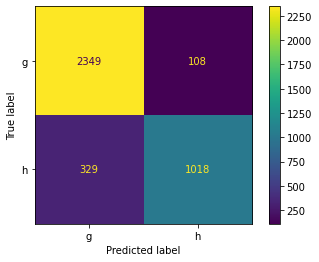

In [39]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_pred_particulas,
                                   labels=['g', 'h'])

# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(20, 4))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['g', 'h'])
disp.plot() 

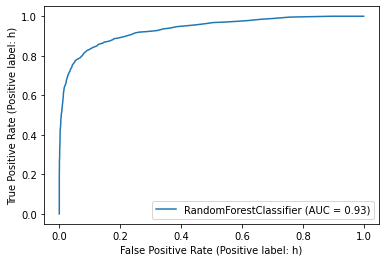

In [40]:
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, x_test_escalonado, y_test, ax=ax)
plt.show()

In [41]:
print(classification_report(y_test, y_pred_particulas, target_names=['gamma', 'hadron']))
print(f"Acurácia: {accuracy_score(y_test, y_pred_particulas) * 100:.2f}%, com uma AUC de 93%")

              precision    recall  f1-score   support

       gamma       0.88      0.96      0.91      2457
      hadron       0.90      0.76      0.82      1347

    accuracy                           0.89      3804
   macro avg       0.89      0.86      0.87      3804
weighted avg       0.89      0.89      0.88      3804

Acurácia: 88.51%, com uma AUC de 93%


- Dentre os algoritmos utilizados (KNN, SVM, Árvore de Decisão...), o classificador de RandomForest foi o que melhor teve acurácia, com uma acurácia de, em média, 88%.

- - Vale ressaltar que, segundo o dataset do problema, a acurácia simples não necessariamente mede a acurácia do modelo. 'A acurácia da classificação simples não é significativa para esses dados, pois classificar um hadron como gamma é pior do que classificar um gamma como hadron. Para comparação de diferentes classificadores, uma curva ROC deve ser usada. Os pontos relevantes nesta curva são aqueles em que a probabilidade de aceitar um hadron como gamma está abaixo de um dos seguintes limites: 0,01, 0,02, 0,05, 0,1, 0,2 dependendo da qualidade exigida da amostra dos eventos aceitos para diferentes experimentos.'

----------------------------
### Questão 5:  Escolha um algoritmo de classificação visto em aula. Com suas palavras, descreva como ele funciona da maneira mais sucinta e precisa possível. <font color='red'> (2 pontos) </font>

# Classificador de Naive Bayes

O algoritmo Naïve Bayes pode ser um algoritmo de aprendizado supervisionado, baseado no teorema de Bayes e usado para resolver problemas de classificação. Não é um algoritmo, mas uma família de algoritmos em que todos compartilham um princípio padrão, ou seja, cada par de recursos classificados é independente um do outro.

O Naive Bayes Classifier é um dos algoritmos de classificação mais simples e melhores que ajuda na construção de modelos de aprendizado de machine learning que farão previsões rápidas.

Naive Bayes é um dos poderosos algoritmos de aprendizado de máquina usados para classificação. É uma extensão do teorema de Bayes em que cada traço assume independência. Ele é usado para uma variedade de tarefas, como filtragem de spam e outras áreas de classificação de texto.

O algoritmo Naive Bayes é útil para:
- Naive Bayes é uma maneira fácil e rápida de prever a classe do conjunto de dados. Usando isso, pode-se realizar uma previsão multiclasse.
- Quando a suposição de independência é válida, Naive Bayes é muito mais capaz do que outros algoritmos tipo regressão logística.
-  Além disso, você precisará de menos dados de treinamento.

Naive Bayes, no entanto, sofre das seguintes desvantagens:
- Se a variável categórica pertence a uma categoria que não foi acompanhada no conjunto de treinamento, então o modelo lhe dará uma probabilidade de 0 que a inibirá de fazer qualquer previsão.
- Naive Bayes assume independência entre suas características. Na vida real, é difícil coletar dados que envolvam recursos completamente independentes. 